In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bc13c1d63c9887b201ca33b01f0d5651


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

655

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 1 | margate
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | sao filipe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | tuatapere
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | sao joao da barra
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | bjornevatn
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | ouidah
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | albany
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | pangnirtung
-----------------------------
Data Ret

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | hobart
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | port hardy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | taolanaro
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | bargal
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | butaritari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | whitehorse
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | ugoofaaru
-----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | chabahar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | cherskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | winder
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | naze
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | miraflores
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | qingdao
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | marsh harbour
-----------------------------
Data Retrieval Complete      
-----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | kiruna
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | cootamundra
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | kodinsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | svetlogorsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | lumby
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 4 | lagoa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 4 | san patricio
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | tomiya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | avera
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | libertador general san martin
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | yar-sale
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | daru
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | haapiti
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 6 | sumkino
-----------------------------
Data Retrieval Complete      
--------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | langsa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | choma
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | ust-tsilma
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | marcona
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | jalu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | darhan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | kamaishi
-----------------------------
Data Retrieval Complete      
-----

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | turukhansk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | beitbridge
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | guerrero negro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | san rafael
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | minas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | russell
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | syasstroy
-----------------------------
Data Retrieval Complete      
--------------

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | stromness
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | deep river
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | mahina
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | hammerfest
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | zwedru
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | cabo san lucas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | kavieng
-----------------------------
Data Retrieval Comp

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 10 | orebro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | siavonga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | prince rupert
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | slidell
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | mutuipe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | linjiang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | mansar
-----------------------------
Data Retrieval Complet

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 12 | japura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | pacific grove
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | vestmannaeyjar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | tartki
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | muisne
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | yei
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | hokitika
-----------------------------
Data Retrieval Compl

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 13 | saint-joseph
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 13 | khawhai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 13 | sulphur
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 13 | lisala
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 13 | dubbo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 13 | rorvik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 13 | muzaffarpur
-----------------------------
Data Retrieval Complete      
------------------

In [9]:
len(city_data)

603

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Margate,51.38,1.39,55.99,73,37,5.01,GB,2020-05-28 05:01:29
1,Sao Filipe,14.90,-24.50,74.37,71,0,9.40,CV,2020-05-28 05:01:29
2,Tuatapere,-46.13,167.68,48.74,87,11,2.84,NZ,2020-05-28 05:01:29
3,Sao Joao Da Barra,-21.64,-41.05,63.43,78,0,15.17,BR,2020-05-28 05:01:29
4,Bjornevatn,69.67,29.98,44.60,81,100,2.24,NO,2020-05-28 04:58:05
5,Ouidah,6.36,2.09,82.40,83,40,10.29,BJ,2020-05-28 05:01:30
6,Albany,42.60,-73.97,73.00,86,100,3.80,US,2020-05-28 04:57:26
7,Pangnirtung,66.15,-65.71,15.04,91,15,2.13,CA,2020-05-28 05:01:30
8,Saint George,37.10,-113.58,88.00,14,1,5.82,US,2020-05-28 04:58:26
9,Masallatah,32.62,14.00,62.51,77,0,5.57,LY,2020-05-28 05:01:30


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/28/20'

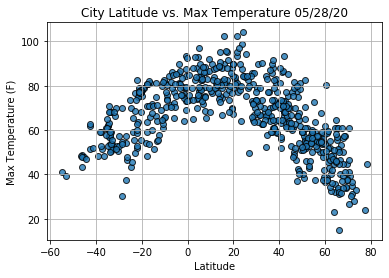

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

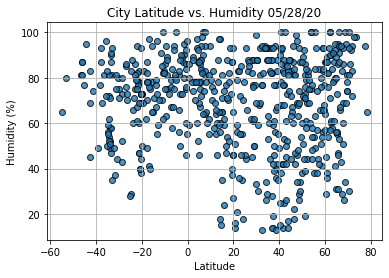

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,humidity,edgecolor="black",linewidth=1,marker="o",alpha=0.8,label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

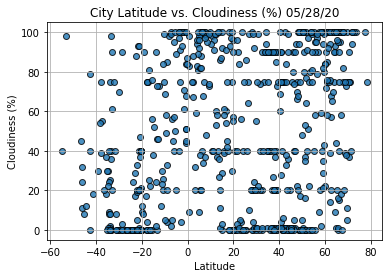

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,cloudiness,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

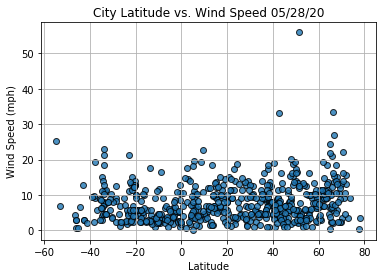

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

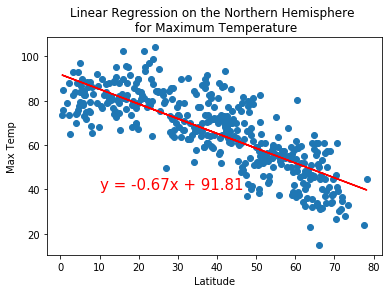

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

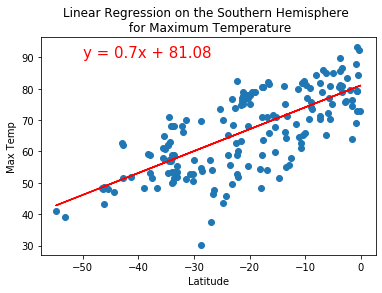

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

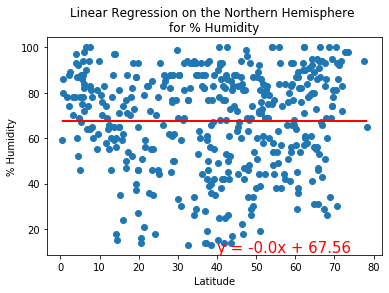

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

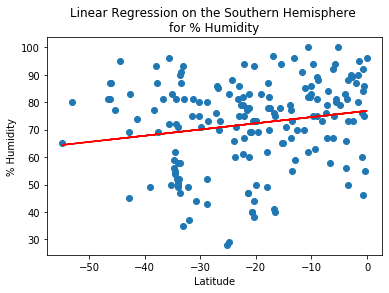

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

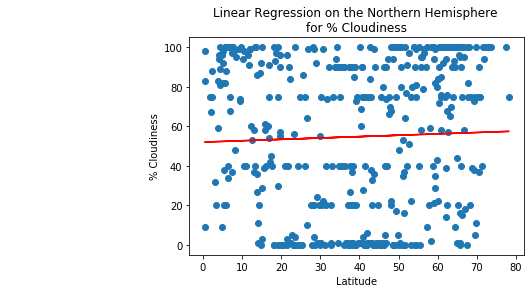

In [34]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

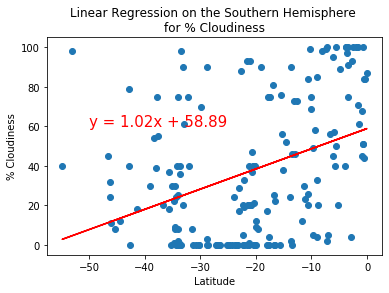

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

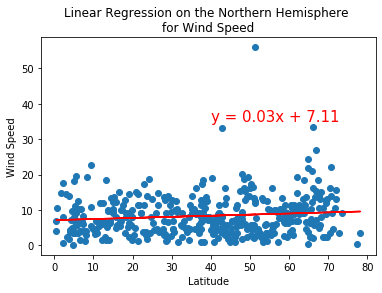

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

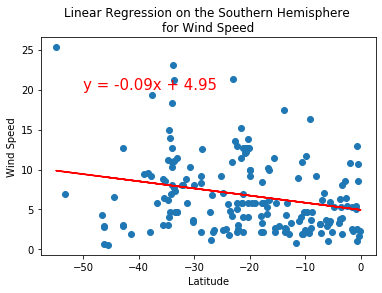

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))